# Suncal API User Manual: Waveform Features

Suncal's CurveFit module provides methods for computing waveform features, such as maximum value, minimum value, rise time, fall time, etc., and their uncertainties.

Use the `suncal.curvefit.Curvefit` model with `suncal.curvefit.Array` to set up the waveform.
Then add items to the `wavecalcs` dictionary to specify which features to calculate.

## Enabling Waveform Features

To specify a waveform feature, set the `wavecalcs` attribute on the `CurveFit`. The attribute is a dictionary whose keys may be any arbitrary name given to the feature, and whose values are instances of `WaveCalc`.

The first parameter to `WaveCalc` is the feature type, one of:

* 'max' - Maximum value and time of maximum value
* 'min' - Minimum value and time of minimum value
* 'pkpk' - Peak-to-peak difference
* 'rise' - Rise time, defined as the time between 10% and 90% of the signal peak-to-peak
* 'fall' - Fall time, defined as the time between 90% and 10% of the signal peak-to-peak
* 'thresh_rise' - Threshold crossing time on a rising edge
* 'thresh_fall' - Threshold crossing time on a falling edge
* 'fwhm' - Pulse width as full-width half-maximum

The `thresh_rise` and `thresh_fall` options take an additional `thresh` parameter to specify the crossing level.

`WaveCalc` also takes an optional `clip` parameter, a tuple of (start, end) times at which to clip the waveform, and an optional `tolerance` parameter for computing probability of conformance to that tolerance.


In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import suncal
from suncal.curvefit import CurveFit, Array, WaveCalc
from suncal.common.limit import Limit

## Maximum Value and Time of Maximum Value

This example shows computation of a waveform's maximum value.

|Name        | Function               | Value     | Standard Uncertainty   | Uncertainty Region (95%)   | Tolerance   | Prob. Conformance  |
|-----------|----------------------|---------|----------------------|--------------------------|-----------|-------------------|
|peak value  | Maximum Value          | 20.32  | 0.14               | (20.04, 20.60)       | &nbsp;      | &nbsp;             |
|&nbsp;      | Time of Maximum Value  | 48  | 5.1               | (37.75, 58.28)       | &nbsp;      | &nbsp;             |

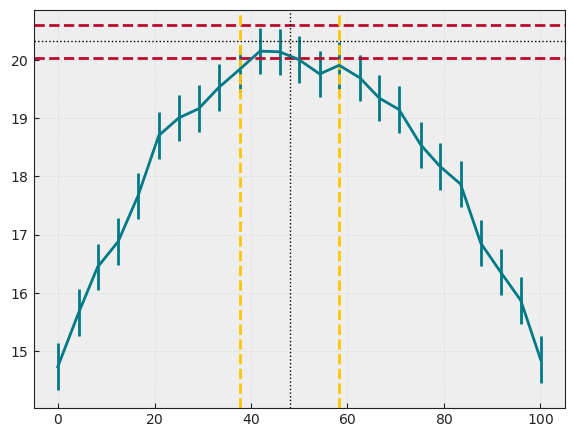

In [2]:
# Make up some data
np.random.seed(9748233)
t = np.linspace(0, 100, 25)
y = -(t-50)**2 / 500 + 20
ut = np.full(t.shape, .1)
uy = np.full(y.shape, .2)
y += np.random.normal(0, uy)
t += np.random.normal(0, ut)
arr = Array(t, y, uy, uy)

# Set up the curvefit and enable a Maximum calculation
curve = CurveFit(arr)
curve.wavecalcs = {
    'peak value': WaveCalc('max'),
}
result = curve.calculate_wave()
display(result)
result.report.plot.plot_feature('peak value')

## Rise Time

This example shows computation of a waveform rise time, then threshold crossing of y = 0.5.

In [3]:
np.random.seed(521235)
t = np.linspace(0, 100, 101)
y = stats.norm.cdf(t, loc=50, scale=5)
ut = np.full(t.shape, .05)
uy = np.full(y.shape, .01)
y += np.random.normal(0, uy)
t += np.random.normal(0, ut)
arr = Array(t, y, ut, uy)
h = 0.5

|Name      | Function   | Value     | Standard Uncertainty   | Uncertainty Region (95%)   | Tolerance   | Prob. Conformance  |
|---------|----------|---------|----------------------|--------------------------|-----------|-------------------|
|a         | Rise Time  | 14.18  | 0.50               | (13.18, 15.17)       | &nbsp;      | &nbsp;             |

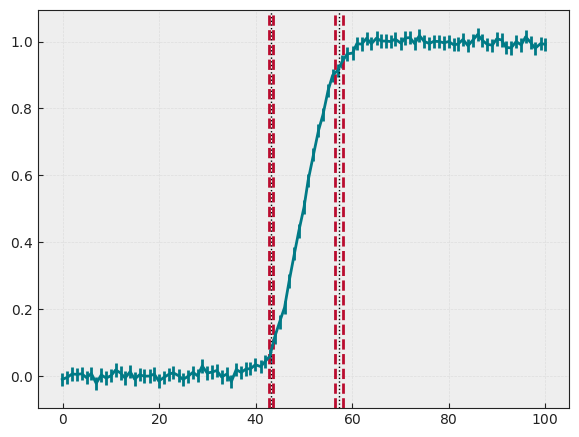

In [4]:
curve = CurveFit(arr)
curve.wavecalcs = {
    'a': WaveCalc('rise'),
}
result = curve.calculate_wave()
display(result)
result.report.plot.plot_feature('a')

|Name      | Function                   | Value     | Standard Uncertainty   | Uncertainty Region (95%)   | Tolerance   | Prob. Conformance  |
|---------|--------------------------|---------|----------------------|--------------------------|-----------|-------------------|
|a         | Rising Threshold Crossing  | 49.97  | 0.12               | (49.76, 50.20)       | &nbsp;      | &nbsp;             |

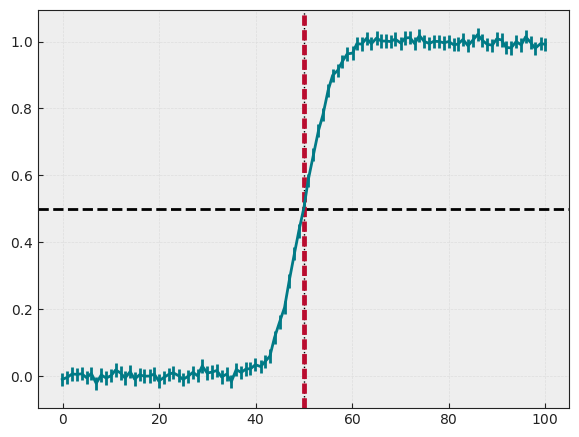

In [5]:
curve = CurveFit(arr)
curve.wavecalcs = {
    'a': WaveCalc('thresh_rise', thresh=0.5),
}
result = curve.calculate_wave()
display(result)
result.report.plot.plot_feature('a')

## Pulse Width

Finally, pulse width (full-width half-maximum) may be calculated. This example adds a tolerance to determine probability of conformance to a pulse width specification of 30 ± 0.6.

In [6]:
np.random.seed(9748233)
t = np.linspace(0, 100, 101)
y = stats.norm.cdf(t, loc=30, scale=5) - stats.norm.cdf(t, loc=60, scale=5)
ut = np.full(t.shape, .1)
uy = np.full(y.shape, .01)
y += np.random.normal(0, uy)
t += np.random.normal(0, ut)
arr = Array(t, y, ut, uy)


|Name      | Function             | Value     | Standard Uncertainty   | Uncertainty Region (95%)   | Tolerance   | Prob. Conformance  |
|---------|--------------------|---------|----------------------|--------------------------|-----------|-------------------|
|a         | Full-width Half-Max  | 30.00  | 0.19               | (29.62, 30.37)       | 30 ± 0.6    | 89.0 %           |

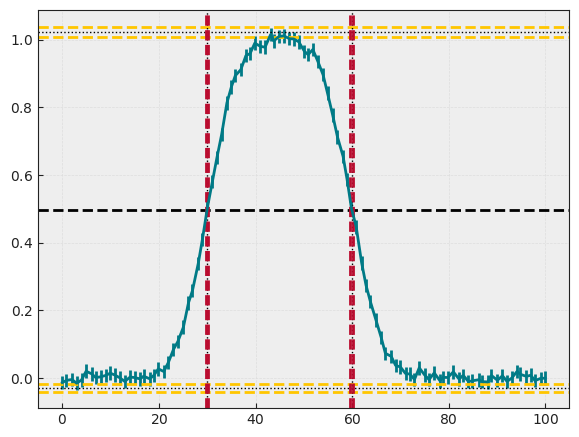

In [7]:
curve = CurveFit(arr)
curve.wavecalcs = {
    'a': WaveCalc('fwhm', tolerance=suncal.Limit.from_plusminus('30', '0.6')),
}
result = curve.calculate_wave()
display(result)
result.report.plot.plot_feature('a')